Further 
SVD, SGD: stimulated annealing, learning curve, softmax regression

1. linear regression 
LinearRegressor(SVD): linear

2. gradient descent
SGDRegressor(StandardScalar): linear

3. polynominal regression 
(PolynominalFeatures): polynominal

4. learning curves 

5. regularized linear model

6. logistic regression 
softmax regression: multinominal logistic regression 
multiclass classifier 

## 1. Linear Regression 

In [1]:
import numpy as np 
from numpy import random 
import matplotlib.pyplot as plt 
random.seed(42)
plt.style.use('ggplot')

In [2]:
X = random.rand(100, 1)
Y = 5 + 2 * X + random.rand(100, 1)

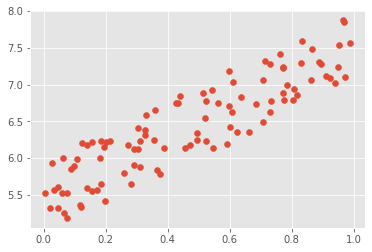

In [3]:
plt.scatter(X, Y)
plt.show()

In [4]:
X_new = np.c_[np.ones((100, 1)), X]
thetas_best = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(Y)
thetas_best
## np.c_[], np.r_[], column stack, row stack 
## 'CClass' object is not callable
## Normal Equation 

array([[5.51359766],
       [1.96646836]])

In [5]:
X_end = [[0], [1]]
X_end_new = np.c_[np.ones((2, 1)), X_end]
Y_end = X_end_new.dot(thetas_best)

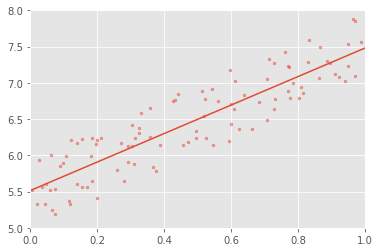

In [6]:
plt.scatter(X, Y, alpha=0.5, s=8)
plt.plot(X_end, Y_end)
plt.axis([0, 1, 5, 8])
plt.show()
## plt.axis: set xmin, xmax, ymin, ymax 

In [7]:
## np.linalg.lstsq: return the least squares solution 
thetas_best, residuals, rank, s = np.linalg.lstsq(X_new, Y, rcond =1e-6)
thetas_best

array([[5.51359766],
       [1.96646836]])

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_
## no need for X_new
## Linearregression bases on scipy.linalg.lstsq()
## SVD approach: singular value decomposition 

(array([5.51359766]), array([[1.96646836]]))

## 2. Gradient Descent 

In [9]:
## StandardScalar for gradient descent approach 
## randn: -1, 1, rand: 0, 1 

In [10]:
def cost(thetas, X=X_new, Y=Y):
    return (1/len(Y)) * np.sum((X.dot(thetas) - Y)**2, axis=0)
def gradients(thetas, X=X_new, Y=Y):
    return  (2/len(Y)) * X.T.dot(X.dot(thetas)-Y)

In [11]:
thetas  = random.rand(2, 1)
iterations = 100
espilon = 0.1
thetas_group = thetas.T
for n in range(iterations): 
    thetas = thetas - espilon * gradients(thetas)
    thetas_group = np.r_[thetas_group, thetas.T]

In [12]:
thetas_group.shape, cost(thetas_group.T).shape

((101, 2), (101,))

In [13]:
from mpl_toolkits import mplot3d

In [14]:
A = np.arange(0, 8, 0.1)
B = np.arange(0, 4, 0.1)
A, B = np.meshgrid(A, B)
R = np.stack((A, B)).reshape(2, -1)
C = cost(R).reshape(A.shape)
A.shape, B.shape, C.shape
## np.stack: A, B must be in same shape

((40, 80), (40, 80), (40, 80))

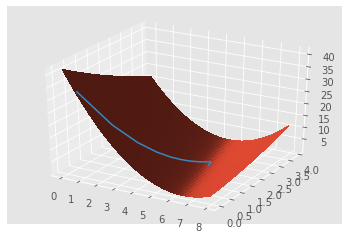

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, C, antialiased=False)
ax.plot(thetas_group[:, 0], thetas_group[:, 1], cost(thetas_group.T))
plt.show()

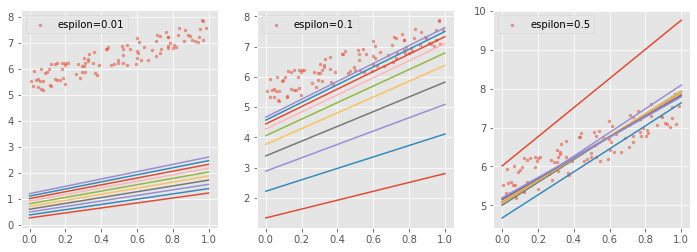

In [16]:
thetas  = random.rand(2, 1)
iterations = 10 
espilons = [0.01, 0.1, 0.5]
fig, axs = plt.subplots(ncols=3, figsize=(12, 4))
for i in range(3):
    axs[i].scatter(X, Y, alpha=0.5, s=8, label=f'espilon={espilons[i]}')
    axs[i].legend()
for n in range(iterations):   
    thetas = thetas - espilons * gradients(thetas)
    for i in range(3): 
        axs[i].plot(X_end, X_end_new.dot(thetas[:, i]))
        
## fig, (axs[0], axs[1], axs[2]) 

In [17]:
## stochastic gradient descent: jump out of local optimal 
## polynominal regression: local minimal and global optimal 
n_epochs = 50 
t0, t1 = 5, 50 
thetas = random.rand(2, 1)
m = len(Y)
thetas_group = thetas.T
def learning_schedule(t):
    return t0/(t+t1)
def get_gradients(thetas, X=X_new, Y=Y):
    return  (2/len(Y)) * X.T.dot(X.dot(thetas)-Y)
for epoch in range(n_epochs):
    for i in range(m):
        random_i = random.randint(m)
        Xi = X_new[[random_i]]
        Yi = Y[[random_i]]
        gradients = get_gradients(thetas, X=Xi, Y=Yi)
        esp =  learning_schedule(epoch*m+i)
        thetas =  thetas - esp * gradients
        thetas_group = np.r_[thetas_group, thetas.T]
thetas
## esp =  learning_schedule(epoch*m+i)
## stimulated annealing: change the espilon gradually

array([[5.50148547],
       [2.00404783]])

In [18]:
thetas_group

array([[0.60642906, 0.00919705],
       [1.94432651, 1.19619672],
       [2.72142296, 1.21594983],
       ...,
       [5.5008593 , 2.00392294],
       [5.50085886, 2.00392271],
       [5.50148547, 2.00404783]])

In [19]:
from matplotlib.animation import FuncAnimation
plt.rcParams['animation.html']='html5'

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
line, = ax.plot((0,1),(0,8))
ax.scatter(X, Y, alpha=0.5, s=8)

def animation(i):
    Y_end = X_end_new.dot(thetas_group[i])
    line.set_data(X_end, Y_end)
    
    label = f'i = {i}, thetas = {np.around(thetas_group[i], decimals=2)}'
    line.set_label(label)
    ax.legend()
    
    return line,   

anim = FuncAnimation(fig, animation, frames=20, interval=500, blit=True)
plt.close()
anim

In [20]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = None, max_iter = 100, tol = 1e-2, eta0 = 0.1 )
sgd_reg.fit(X, Y.reshape(-1))
sgd_reg.intercept_, sgd_reg.coef_
## eta0: initial learning rate 

(array([5.42303676]), array([2.14665968]))

In [21]:
Y.reshape(-1).shape, Y.ravel().shape
## column vector and 1d array 

((100,), (100,))

## 3. Polynominal Regression

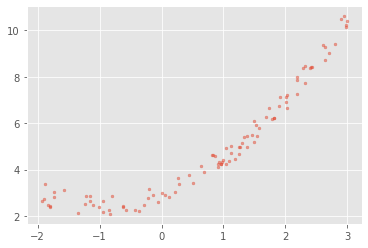

In [22]:
m = 100 
X = 5 * random.rand(m, 1) - 2
Y =  0.5*(X-1)**2 +  2*X + 2 + random.rand(m, 1)
plt.scatter(X, Y, alpha=0.5, s=8)
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
## include_bias: i.e. a column of ones 
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.36680375]), array([-0.36680375,  0.13454499]))

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y.ravel())
lin_reg.intercept_, lin_reg.coef_

(2.949438008026915, array([1.01989111, 0.50264308]))

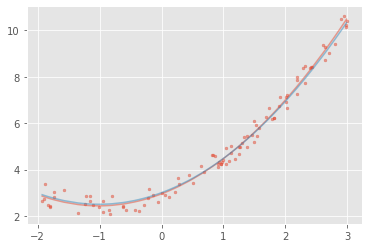

In [25]:
X_sorted = np.sort(X, axis=0)
X_sorted_poly = poly_features.fit_transform(X_sorted)
pred = lin_reg.predict(X_sorted_poly)
plt.scatter(X, Y, alpha=0.5, s=8)
plt.plot(X_sorted, pred, alpha=0.5)
plt.plot(X_sorted, 3 + 0.99*X_sorted + 0.49*X_sorted**2, alpha=0.5)
plt.show()

## 4. learning curve 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def plot_learning_curve(model, X, Y):
    X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=42)
    val_errors, train_errors = [], []
    for i in range(1, len(Y)):
        model.fit(X_train[:i], y_train[:i])
        ## X_train[:i]
        train_pred = model.predict(X_train[:i])
        val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:i], train_pred))
        val_errors.append(mean_squared_error(y_val, val_pred))
    plt.plot(train_errors, label='train' )
    plt.plot(val_errors, label='val' )
    plt.legend()
    return train_errors, val_errors

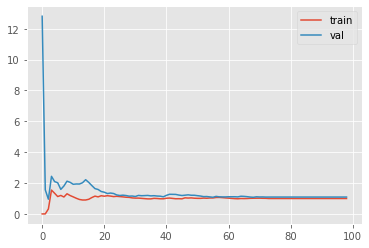

In [27]:
lin_reg = LinearRegression()
train_errors, val_errors = plot_learning_curve(lin_reg, X, Y)

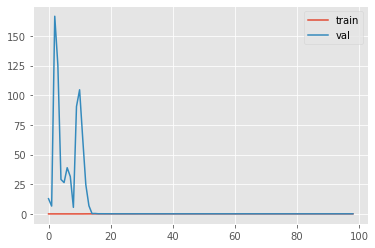

In [28]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
train_errors, val_errors = plot_learning_curve(poly_reg, X, Y)

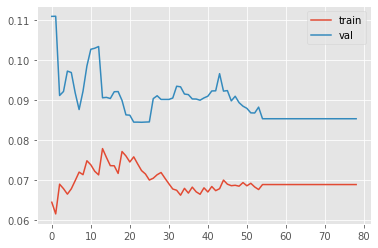

In [29]:
plt.plot(train_errors[20:], label='train' )
plt.plot(val_errors[20:], label='val' )
plt.legend()
plt.show()

## 5. Regularized Linear Model 

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_poly, Y)
ridge_reg.intercept_, ridge_reg.coef_
## slover = 'auto', 'svd', 'cholesky': scipy.linalg.solve()

(array([2.9505794]), array([[1.01323951, 0.50414383]]))

In [31]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X_poly, Y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([2.81609715]), array([1.00104191, 0.53854938]))

In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, Y)
lasso_reg.intercept_, lasso_reg.coef_

(array([2.98511882]), array([0.96856843, 0.50366376]))

In [33]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X_poly, Y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([2.7978617]), array([0.99886169, 0.54231414]))

In [34]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5 )
elastic_reg.fit(X_poly, Y)
elastic_reg.intercept_, elastic_reg.coef_

(array([2.97345409]), array([0.96309328, 0.50985132]))

In [35]:
## penalty='l1', 'l2', 'elasticnet'
## absolute_value_norm: l1 norm , euclidean_norm: (distance), l2 norm  

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.pipeline import Pipeline
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=42)
poly_scalar = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scalar', StandardScaler())  
])
X_train_prepared = poly_scalar.fit_transform(X_train)
X_val_prepared = poly_scalar.transform(X_val)

In [37]:
import warnings
warnings.filterwarnings('ignore')

sgd_reg = SGDRegressor(penalty = None, max_iter=1, tol = 0.001, eta0=0.0001,
                      learning_rate='constant', warm_start=True )
best_epoch = None 
best_model = None 
minumum_val_error = np.inf 
n_epochs = 1000
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_prepared, y_train.ravel())
    y_val_pred = sgd_reg.predict(X_val_prepared)
    val_error = mean_squared_error(y_val, y_val_pred)
    if val_error < minumum_val_error:
        minumum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_epoch    

## from sklearn.base import clone
## best_model = clone(sgd_reg)
## warm_start = True: fit() start from last end 
## eta: Greek Alphabet 
## warnings.filterwarnings('once')

605

## 6. Logistic Regression 

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data']
Y = iris['target']
X.shape, Y.shape

((150, 4), (150,))